# Neural Network

In [1]:
import pickle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm
from sklearn.cross_validation  import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation  import cross_val_score
from sklearn.neural_network import MLPClassifier

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/Part2/temp"
TRAINFILENAME="clean_historical_data1_time_Q12005.txt.0"
TESTFILENAME="clean_historical_data1_time_Q22005.txt.0"

In [3]:
Train_DF = pd.read_csv(MAINPATH+"/"+TRAINFILENAME,index_col=None)

In [4]:
Train_DF.head()

,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,DELINQUENT
0,F105Q1000001,200504,190000.0,0,0,360,5.625,0.0,0
1,F105Q1000001,200505,190000.0,0,1,359,5.625,0.0,0
2,F105Q1000001,200506,190000.0,0,2,358,5.625,0.0,0
3,F105Q1000001,200507,189000.0,0,3,357,5.625,0.0,0
4,F105Q1000001,200508,189000.0,0,4,356,5.625,0.0,0


In [5]:
traincols=['LOAN_SEQ_NO','MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
traincols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']

In [6]:
y_train=Train_DF['DELINQUENT']
Train_DF=Train_DF[traincols]

In [7]:
Test_DF=pd.read_csv(MAINPATH+"/"+TESTFILENAME,index_col=None)

In [8]:
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']


In [9]:
y_test=Test_DF['DELINQUENT']
Test_DF=Test_DF[testcols]

In [44]:
clf = MLPClassifier(solver='adam', learning_rate_init=0.1,hidden_layer_sizes=(2, 4), random_state=1)
clf = clf.fit(Train_DF, y_train)

## Train Accuracy

In [40]:
pred = clf.predict(Test_DF)

In [41]:
print(clf.score(Train_DF,y_train))

0.951103714286


## Test Accuracy

In [43]:
metrics.accuracy_score(y_test,pred)

0.94982571428571427

In [42]:
pd.crosstab(y_test, pred,rownames=['pred'],colnames=['ytest'])

ytest,0
pred,
0,6648780
1,351220


In [37]:
preds = clf.predict_proba(Test_DF)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

## ROC Curve

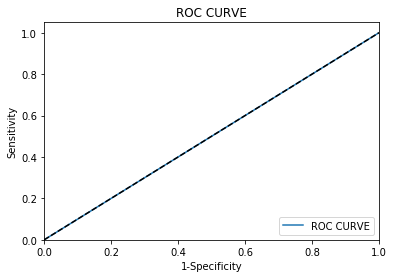

In [38]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()